In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, linear_model, metrics

%matplotlib inline

In [2]:
# Read the dataset from given source
dataset = pd.read_csv("./wdbc.dataset", header = None)

In [3]:
#check if dataset has any NULL (NaN) values
dataset.isnull().sum().sum()

0

In [4]:
# Drop id column as it is inconsequential to the result
dataset.drop(dataset.columns[0], axis = 1, inplace=True)

In [5]:
# Extract features and dependent variable
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
y = np.expand_dims(y, -1)

In [6]:
# Convert categorical data to numeric because Logistic Regression cannot deal with categories
# LabelEncoder(sklearn) can be used as well
y = (y == 'M').astype('int')

In [7]:
# Split data into training, validation and testing data
# Fixing random state allows us to split the data the same way every time
# This allows to see consistent results or rather same results every time we run the model
# Remove random state field to randomize split each time and vary the model's predictions!
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)

In [8]:
X_test, X_validate, y_test, y_validate = model_selection.train_test_split(X_test, y_test, test_size = 0.5, random_state = 7)

In [9]:
lr = 0.01
epoch = 10000

# calculate mean and standard deviation of X_train which will be used to normalize data in our model
X_mean = np.mean(X_train)
X_std = np.std(X_train)

# initialize weights and bias to zeros, can be randomized as well
w = np.zeros((X_train.shape[1], 1))
bias = np.zeros((1,))

In [10]:
def normalizer(X):
    # normalize data to have mean of 0 and standard deviation as 1
    # We do this so that each feature is treated equally by the loss function
    X = (X - X_mean) / X_std
    return X

In [11]:
def linear_equation(X, w, bias):
    # calculate z = theta * X + bias
    return np.dot(X, w) + bias

In [12]:
def sigmoid(z):
    # sigmoid function to squash the values between 0 & 1
    return (1 / (1 + np.exp(-z)))

In [13]:
def predict(X, w, bias):
    # returns a list of predictions made by applying update weights to the above described functions
    X = normalizer(X)
    return (sigmoid(linear_equation(X, w, bias)) >= 0.5).astype(int)

In [14]:
def calc_loss(X, y, w, bias):
    # calculating loss defined by cross-entropy
    z = linear_equation(X, w, bias)
    probabilities = sigmoid(z)

    #adding very small weights to log function so log(0) error can be avoided
    return -np.mean((y * np.log(probabilities + 1e-16)) + ((1-y) * np.log((1 - probabilities) + 1e-16)))

In [15]:
def get_weights(X, y, w, bias):
    
    # initialize accuracy list, loss for validation and training data
    acc = []
    loss_val = []
    loss_train = []
    
    X = normalizer(X)

    for ep in range(epoch):
        z = linear_equation(X, w, bias)
        probabilities = sigmoid(z)

        intermediate = probabilities - y

        # Subtract gradients from initialized weights to update them
        # We do this so that they move towards the minima where accuracy is highest
        delta_w = np.mean(intermediate * X)
        delta_bias = np.mean(intermediate)

        w = w - lr * delta_w
        bias = bias - lr * delta_bias

        # Validate data and update accuracy list
        acc.append(np.mean(predict(X_validate, w, bias) == y_validate))

        # Calculate loss for each epoch with respect to validation data and training data
        loss_val.append(calc_loss(normalizer(X_validate), y_validate, w, bias))
        loss_train.append(calc_loss(X, y, w, bias))
    return w, bias, acc, loss_val, loss_train

In [16]:
# get final weights and losses calculated 
w_final, bias_final, acc, loss_val, loss_train = get_weights(X_train, y_train, w, bias)

In [17]:
# make prediction on test set and calc accuracy
y_pred = predict(X_test, w_final, bias_final)
accuracy = np.mean(y_pred == y_test)
print("Accuracy on test data = {:.2f}".format(accuracy * 100))

Accuracy on test data = 92.98


In [18]:
# calc loss for test set
calc_loss(X_test, y_test, w_final, bias_final)

24.56090765860316

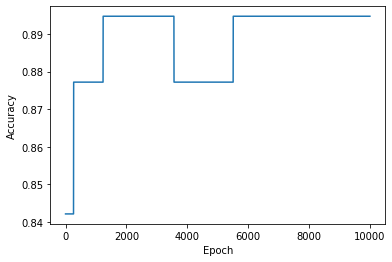

In [19]:
# plot accuracy vs epoch
plt.plot([x for x in range(len(acc))], acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

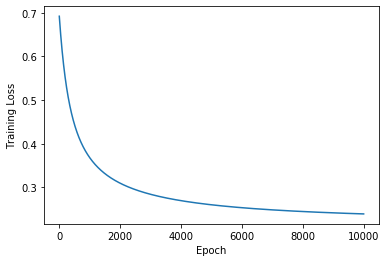

In [20]:
# plot training loss vs epoch
plt.plot([x for x in range(len(loss_train))], loss_train)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.show()

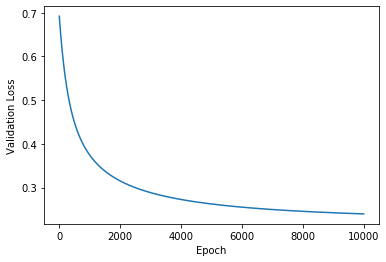

In [21]:
# plot validation loss vs epoch
plt.plot([x for x in range(len(loss_val))], loss_val)
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.show()

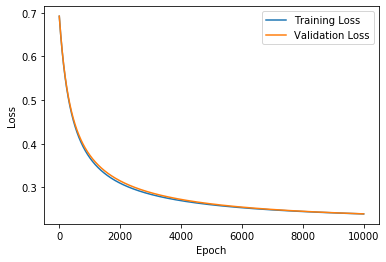

In [22]:
# plot both training loss and valdation loss in the same graph 
plt.plot([x for x in range(len(loss_train))], loss_train, label = "Training Loss")
plt.plot([x for x in range(len(loss_val))], loss_val, label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [23]:
# confusion matrix to find True Positives, True Negatives, False Positives, False Negatives
cm = metrics.confusion_matrix(y_test, y_pred)

In [24]:
TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1] 

In [25]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

In [26]:
precision = (TP) / (TP + FP)

In [27]:
recall = (TP) / (TP + FN)

In [29]:
TP, FP, FN, TN

(38, 0, 4, 15)

In [28]:
print("Accuracy: {0}, Precision: {1}, Recall: {2}".format(accuracy, precision, recall))

Accuracy: 0.9298245614035088, Precision: 1.0, Recall: 0.9047619047619048
